In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from karateclub import DeepWalk, Walklets, HOPE, NetMF, Diff2Vec, GraRep, Node2Vec
from utils import read_data, get_cosine_sim_matrix, preprocessing_, compute_metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import pickle
import gensim.downloader
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.decomposition import PCA

In [2]:

def visualize_TSNE(embeddings,target):
    tsne = TSNE(n_components=2)
    data = tsne.fit_transform(embeddings)
    print(data.shape)
#     data = embeddings
    #plt.figure(figsize=(12, 6))
    plt.title("TSNE visualization of the embeddings")
    plt.scatter(data[:,0],data[:,1],c=target)

    return

In [33]:
group = 'NG9'
d = 9
text_corpus, file_names, target = read_data(group)

preprocessed_text = [preprocessing_(e) for e in text_corpus]
text_corpus = preprocessed_text

print(len(text_corpus))

1800


In [34]:
pca = PCA(n_components=192)

## Word2vec

In [35]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [36]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(1800, 192)

(1800, 2)


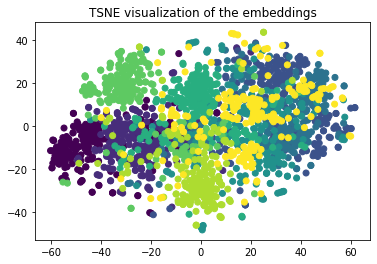

In [37]:
visualize_TSNE(temp_vec, target)

In [38]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.8623878427312006
NMI :  0.736244755306146


0.8623878427312006

In [39]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.4042232798430398


## Glove

In [40]:
w2v = gensim.downloader.load('glove-wiki-gigaword-300')

In [41]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(1800, 192)

In [42]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.8600493602119851
NMI :  0.7217077107597246


0.8600493602119851

In [43]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.3529034480590233


## Fasttext

In [44]:
w2v = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [45]:
temp_vec = []
for doc in text_corpus:
    words = doc.split()
    temp_vec.append(np.mean([w2v[w] if w in w2v else np.zeros(300) for w in words ], axis=0))

temp_vec = np.array(temp_vec)
temp_vec = pca.fit_transform(temp_vec); temp_vec.shape

(1800, 192)

In [46]:
scaler = MinMaxScaler()
scaler.fit(temp_vec)
scaled_emb = scaler.transform(temp_vec)
compute_metrics(scaled_emb, target)


Evaluated embeddings using Multinomial Naive Bayes
F1 - score(Macro) :  0.8694481507692592
NMI :  0.7391747539222084


0.8694481507692592

In [47]:
kmeans = KMeans(n_clusters=d, random_state=0).fit(temp_vec)
nmi = normalized_mutual_info_score(target,kmeans.labels_)
print(nmi)

0.25847383298987453
